In [32]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


In [33]:
df = pd.read_csv("sgemm_product.csv")
df["RunF"]= (df["Run1 (ms)"] + df["Run2 (ms)"]+ df["Run3 (ms)"]+df["Run4 (ms)"])/4
df=df.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'])
#normalize the data
df = (df - df.mean())/df.std()
#split between test and train
from sklearn.model_selection import train_test_split 
train,test = train_test_split(df,test_size = 0.4, random_state=50000)
train.shape


(144960, 15)

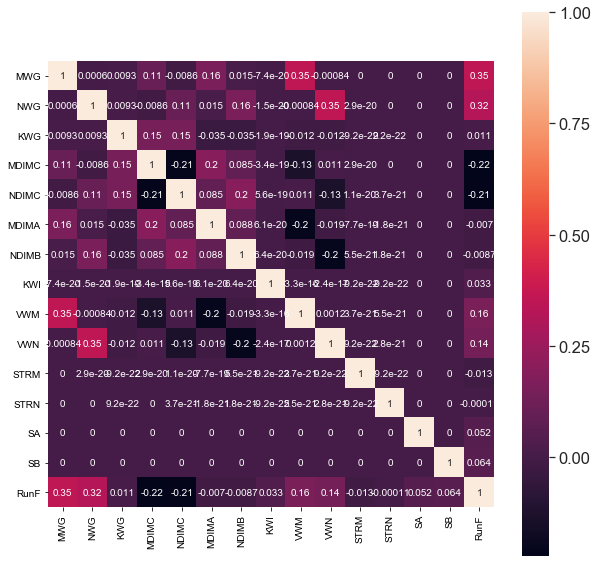

In [34]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [28]:
#def x and y as matrices 
#setting the matrixes
X = train.iloc[:, 0:14]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y =  train.iloc[:, -1].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,15])

#def x and y as matrices for test 
#setting the matrixes
X_test = test.iloc[:, 0:14]
ones_test = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones_test,X_test),axis=1)

y_test =  test.iloc[:, -1].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray


#set hyper parameters
alpha = 0.5
iters = 500

In [29]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))
y=y.reshape([-1,1])

In [30]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    #test_cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
        
        
        
    
    return theta, cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)


[[-0.00345573  0.37850918  0.35193465  0.1066305  -0.35159244 -0.34435266
   0.02903819  0.02520643  0.03117665 -0.00540045 -0.01463529 -0.01023207
   0.00132195  0.04949481  0.06264252]]
0.2914664552488108


In [12]:
y_test=y_test.reshape([-1,1])

In [13]:
####test set costs
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    test_cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
        test_cost[i]=computeCost(X_test, y_test, theta)
        
        
    
    return theta, cost , test_cost

#running the gd and cost function
g,cost, test_cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
finalCost_test = computeCost(X_test,y_test,g)
print(finalCost_test)

[[-0.00345573  0.37850918  0.35193465  0.1066305  -0.35159244 -0.34435266
   0.02903819  0.02520643  0.03117665 -0.00540045 -0.01463529 -0.01023207
   0.00132195  0.04949481  0.06264252]]
0.3035821268760367


Text(0.5, 1.0, 'MLR Error vs. Training and Testing Epoch')

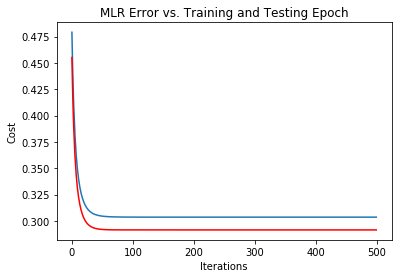

In [14]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), test_cost, cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('MLR Error vs. Training and Testing Epoch') 

In [31]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'RunF'],
      dtype='object')